# Label distribution


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report 

In [47]:
raw_train = pd.read_csv("../data/full/train_labels.csv", sep='\n',header=0)
raw_dev = pd.read_csv("../data/full/dev_labels.csv", sep='\n',header=0)
raw_test = pd.read_csv("../data/full/test_labels.csv", sep='\n',header=0)
raw = raw_train.append(raw_dev, ignore_index=True)
raw = raw.append(raw_test, ignore_index=True)

In [48]:
raw_train.head()

,high_levels
0,"[2, 5, 6, 17]"
1,"[3, 5, 6, 9, 12]"
2,[7]
3,"[6, 7, 16, 17]"
4,"[1, 6, 7, 17]"


In [49]:
raw.shape

(55170, 1)

In [50]:
raw.loc[0].values[0]

'[2, 5, 6, 17]'

In [51]:
high_level_count = np.zeros(19)

In [52]:
import ast
row = raw.loc[0].values
print(row)
ast.literal_eval(row[0])

['[2, 5, 6, 17]']


[2, 5, 6, 17]

In [53]:
raw2 = raw['high_levels'].apply(lambda x: ast.literal_eval(x))

In [54]:
raw2

0                           [2, 5, 6, 17]
1                        [3, 5, 6, 9, 12]
2                                     [7]
3                          [6, 7, 16, 17]
4                           [1, 6, 7, 17]
                       ...               
55165    [0, 2, 4, 5, 11, 12, 15, 16, 18]
55166                [2, 6, 7, 8, 15, 17]
55167                     [1, 2, 3, 6, 8]
55168                        [0, 4, 6, 7]
55169                 [2, 5, 6, 7, 9, 17]
Name: high_levels, Length: 55170, dtype: object

In [55]:
for row in raw2:
    high_level_count[row] += 1

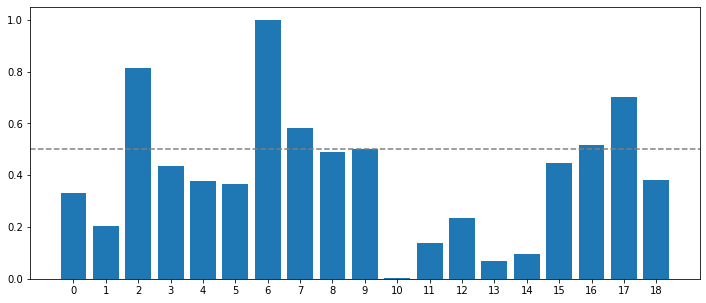

In [56]:
high_level_count
plt.subplots(figsize=(12,5))
plt.bar(range(len(high_level_count)), high_level_count/np.max(high_level_count))
plt.axhline(0.5, color='grey', ls='--')
plt.xticks(range(len(high_level_count)))
plt.show()

## What are 2, 6, 17? 
## What is 10, 13, 14? 

In [ ]:
# 0  • 001-139 Infectious And Parasitic Diseases
# 1  • 140-239 Neoplasms
# 2  • 240-279 Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders **
# 3  • 280-289 Diseases Of The Blood And Blood-Forming Organs
# 4  • 290-319 Mental Disorders
# 5  • 320-389 Diseases Of The Nervous System And Sense Organs
# 6  • 390-459 Diseases Of The Circulatory System **
# 7  • 460-519 Diseases Of The Respiratory System
# 8  • 520-579 Diseases Of The Digestive System
# 9  • 580-629 Diseases Of The Genitourinary System
# 10 • 630-679 Complications Of Pregnancy, Childbirth, And The Puerperium *****
# 11 • 680-709 Diseases Of The Skin And Subcutaneous Tissue
# 12 • 710-739 Diseases Of The Musculoskeletal System And Connective Tissue
# 13 • 740-759 Congenital Anomalies *****
# 14 • 760-779 Certain Conditions Originating In The Perinatal Period *****
# 15 • 780-799 Symptoms, Signs, And Ill-Defined Conditions
# 16 • 800-999 Injury And Poisoning
# 17 • V01-V91 Supplementary Classification Of Factors Influencing Health Status And Contact
# With Health Services **
# 18 • E000-E999 Supplementary Classification Of External Causes Of Injury And Poisoning

In [93]:
clean_data = pd.read_csv("../data/small/small_data.csv", header=0, sep='\n\n')

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [94]:
clean_data.head()

,ROW_ID
0,SUBJECT_ID
1,HADM_ID
2,TEXT
3,ICD9_codes
4,high_levels


In [148]:
# import csv

# i = 0
# for x in open("../data/small/small_data.csv"):
#     print(x,i)
#     if x == "ROW_ID\n":
#         continue
#     else:
#         i += 1
#     if i > 10:
#         break
#     if i % 9 == 0:
#         print("SUBJECT_ID", x)
#     if i % 9 == 1:
#         print("HADM_ID", x)
    
# #     reader=csv.csvReader(file)
# #     data=list(reader)

In [119]:
diag_ = pd.read_csv("../data/diag_.csv", sep='\t')

In [120]:
diag_['high_levels'] = diag_['high_levels'].apply(lambda x: ast.literal_eval(x))

In [121]:
diag_['ICD9_codes'] = diag_['ICD9_codes'].apply(lambda x: ast.literal_eval(x))

In [122]:
diag_.head()

,HADM_ID,SUBJECT_ID,ICD9_codes,high_levels
0,100001,58526,"[5849, 40390, 5853, V5867, 5780, 25063, 25043,...","[2, 5, 6, 8, 9, 11, 17]"
1,100003,54610,"[53100, 4019, 5715, 07054, 2851, 45621, 53789,...","[0, 3, 6, 8, 15]"
2,100006,9895,"[486, 2761, V1582, 51881, 20300, V1251, 49320,...","[1, 2, 4, 7, 15, 17]"
3,100007,23018,"[486, 4019, 5570, 56081]","[6, 7, 8]"
4,100009,533,"[2859, 41401, 4111, 2720, 4019, 25000, 44021, ...","[2, 3, 6, 16, 17]"


In [126]:
all_codes = [item for sublist in diag_['ICD9_codes'] for item in sublist]
all_uniq_codes = np.unique(all_codes)

In [128]:
print(len(all_codes))
print(len(all_uniq_codes))

634709
6841


In [131]:
diag = pd.read_csv("../data/diag.csv", sep='\t')
diag.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,high_level
0,1297,109,172335,1.0,40301,6
1,1311,109,173633,1.0,40301,6
2,1019,109,131345,1.0,40301,6
3,1039,109,131376,1.0,40301,6
4,1059,109,135923,1.0,40301,6


In [132]:
code_and_high = diag[['ICD9_CODE','high_level']]

In [133]:
code_and_high.head()

,ICD9_CODE,high_level
0,40301,6
1,40301,6
2,40301,6
3,40301,6
4,40301,6


In [135]:
code_and_high = code_and_high.drop_duplicates()
code_and_high.head()

,ICD9_CODE,high_level
0,40301,6
172,486,7
5011,58281,9
5078,5855,9
5172,4254,6


In [144]:
code_and_high_ = code_and_high.groupby('high_level').count()['ICD9_CODE']
code_and_high_

high_level
0      298
1      476
2      239
3       99
4      250
5      532
6      416
7      190
8      368
9      239
10     201
11     138
12     372
13     259
14     193
15     254
16    1347
17     470
18     500
Name: ICD9_CODE, dtype: int64

In [147]:
6000/19

315.7894736842105

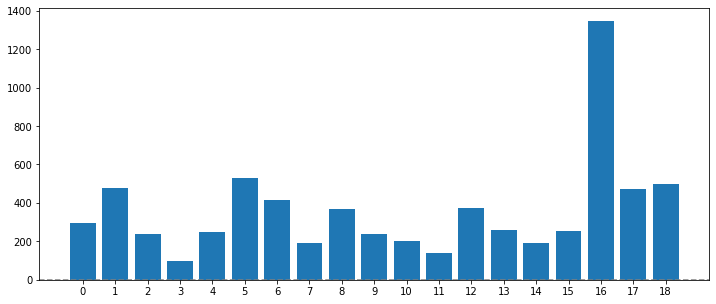

In [146]:
code_and_high_
plt.subplots(figsize=(12,5))
plt.bar(range(len(code_and_high_)), code_and_high_)
plt.axhline(0.5, color='grey', ls='--')
plt.xticks(range(len(code_and_high_)))
plt.show()

In [ ]:
# 1 for 0-19 codes
# then 19 different models - 1 for each label. 

## Test 3 baselines:

- all 1s
- 1s for any labels appearing over 50%, 0 o.w.
- Bernoulli == 1 with p as the proportion of documents the labels appears in

use small dataset size

In [15]:
from docopt import docopt
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu, SmoothingFunction
# from nmt_model import Hypothesis, NMT
import numpy as np
from typing import List, Tuple, Dict, Set, Union
from tqdm import tqdm
# from utils import read_corpus, batch_iter, ind_to_one_hot
# from vocab import Vocab, VocabEntry

import torch
import torch.nn.utils

from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report 
from statistics import harmonic_mean 

import csv
import ast

In [17]:
file_path = '../data/small/dev_labels.csv'
data = []
all_labels = set()

with open(file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\n')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
#                 print(f'Column names are {", ".join(row[0])}')
            line_count += 1
        else:
#             if column == 'text':
#                 sent = nltk.word_tokenize(row[0])
#                 if remove_stopwords:
#                     sent = [i for i in sent if i not in stop_words]
#                     sent = [i for i in sent if i not in dumb_words]
#                 # cut off sentence lengths:
#                 if sent_max_length > 0:
#                     data.append(sent[:int(sent_max_length)])
#                 else:
#                     data.append(sent)
#             else:
            this_row_labs = ast.literal_eval(row[0])
            data.append(this_row_labs)
            line_count += 1
    print(f'Processed {line_count} lines.')

Processed 1101 lines.


In [19]:
def ind_to_one_hot(labels_list, num_labels):
    """
    @param labels_list(List[List[int]]): 
    @param num_labels: Total number of labels
    """
    labels_torch = torch.zeros(len(labels_list), num_labels)
    for i in range(len(labels_list)):
        labels_torch[i,labels_list[i]] = 1
    return labels_torch

In [ ]:
label_freqs = high_level_count/np.max(high_level_count)

In [21]:
dev_labels = ind_to_one_hot(data, num_labels=19)

In [68]:
base1 = torch.ones((1100,19)) # all 1s
base2 = torch.zeros((1100,19)) # 2, 6, 7, 17 = 1
base2[:,[2,6,7,17]] = 1
base3 = np.zeros((1100,19))
for col in range(19):
    base3[:,col] = np.random.binomial(n=1,p=label_freqs[col],size=1100)
base3 = torch.from_numpy(base3)

In [70]:
print(base1)
print()
print(base2)
print()
print(base3)

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

tensor([[0., 0., 1.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 1., 0.]])

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [1., 1., 1.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 1., 1., 1.]], dtype=torch.float64)


In [71]:
def check_baseline(labels, baseline_labels):
    f1 = f1_score(y_true=labels, y_pred=baseline_labels, 
                     pos_label=1, average='micro')
    print("calcualted val f1: ", f1)
    cr = classification_report(y_true=labels, y_pred=baseline_labels, 
                               labels=None, target_names=None, 
                               sample_weight=None, digits=2, 
                               output_dict=False)
    print("******** Validation Report *********\n",cr)

In [72]:
check_baseline(labels=dev_labels, baseline_labels=base1)

calcualted val f1:  0.5062359289568666
******** Validation Report *********
               precision    recall  f1-score   support

           0       0.31      1.00      0.47       336
           1       0.16      1.00      0.28       178
           2       0.72      1.00      0.84       795
           3       0.38      1.00      0.55       422
           4       0.28      1.00      0.43       304
           5       0.32      1.00      0.49       357
           6       0.87      1.00      0.93       958
           7       0.51      1.00      0.68       562
           8       0.43      1.00      0.60       473
           9       0.49      1.00      0.66       536
          10       0.00      1.00      0.01         3
          11       0.12      1.00      0.21       129
          12       0.23      1.00      0.37       249
          13       0.04      1.00      0.07        42
          14       0.00      0.00      0.00         0
          15       0.36      1.00      0.53       394
    

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [73]:
check_baseline(labels=dev_labels, baseline_labels=base2)

calcualted val f1:  0.5070103631455195
******** Validation Report *********
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.00      0.00      0.00       178
           2       0.72      1.00      0.84       795
           3       0.00      0.00      0.00       422
           4       0.00      0.00      0.00       304
           5       0.00      0.00      0.00       357
           6       0.87      1.00      0.93       958
           7       0.51      1.00      0.68       562
           8       0.00      0.00      0.00       473
           9       0.00      0.00      0.00       536
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00       129
          12       0.00      0.00      0.00       249
          13       0.00      0.00      0.00        42
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00       394
    

/Users/austinmurphy/opt/anaconda3/envs/attentionxml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
check_baseline(labels=dev_labels, baseline_labels=base3)

calcualted val f1:  0.5219790797664121
******** Validation Report *********
               precision    recall  f1-score   support

           0       0.29      0.32      0.30       336
           1       0.16      0.18      0.17       178
           2       0.72      0.79      0.76       795
           3       0.39      0.46      0.42       422
           4       0.27      0.37      0.31       304
           5       0.33      0.38      0.35       357
           6       0.87      1.00      0.93       958
           7       0.51      0.60      0.55       562
           8       0.43      0.49      0.46       473
           9       0.48      0.51      0.50       536
          10       0.00      0.00      0.00         3
          11       0.08      0.09      0.09       129
          12       0.23      0.23      0.23       249
          13       0.05      0.10      0.07        42
          14       0.00      0.00      0.00         0
          15       0.35      0.43      0.39       394
    

## Learning more than baselines!